In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('../../src')

# Set up paths
import os
print(f"Current working directory: {os.getcwd()}")

data_dir = Path('../data')
collect_dir = data_dir / '00_collect'

print(f"Data directory: {data_dir}")
print(f"Collect directory: {collect_dir}")

# Check if directories exist
print(f"Data dir exists: {data_dir.exists()}")
print(f"Collect dir exists: {collect_dir.exists()}")

# Also try absolute path as backup
abs_data_dir = Path('/Users/jeff/sledhead-imu/data')
abs_collect_dir = abs_data_dir / '00_collect'
print(f"Absolute data dir exists: {abs_data_dir.exists()}")
print(f"Absolute collect dir exists: {abs_collect_dir.exists()}")


Current working directory: /Users/jeff/sledhead-imu/notebooks/00_exploration
Data directory: ../data
Collect directory: ../data/00_collect
Data dir exists: False
Collect dir exists: False
Absolute data dir exists: True
Absolute collect dir exists: True


In [41]:
# Load sample data (if available)
imu_files = list((collect_dir / 'imu').glob('sample_imu_*.csv'))
symptom_files = list((collect_dir / 'symptoms').glob('sample_*.csv'))

# If no files found with relative path, try absolute path
if len(imu_files) == 0:
    print("Trying absolute path for IMU files...")
    imu_files = list((abs_collect_dir / 'imu').glob('sample_imu_*.csv'))
if len(symptom_files) == 0:
    print("Trying absolute path for symptom files...")
    symptom_files = list((abs_collect_dir / 'symptoms').glob('sample_*.csv'))

print(f"Found {len(imu_files)} IMU sample files")
print(f"Found {len(symptom_files)} symptom sample files")

# List the files
if imu_files:
    print("\nIMU files:")
    for f in imu_files[:5]:  # Show first 5
        print(f"  - {f.name}")
    if len(imu_files) > 5:
        print(f"  ... and {len(imu_files) - 5} more")

if symptom_files:
    print("\nSymptom files:")
    for f in symptom_files:
        print(f"  - {f.name}")


Trying absolute path for IMU files...
Trying absolute path for symptom files...
Found 10 IMU sample files
Found 1 symptom sample files

IMU files:
  - sample_imu_A002_R001.csv
  - sample_imu_A003_R001.csv
  - sample_imu_A003_R002.csv
  - sample_imu_A002_R002.csv
  - sample_imu_A002_R003.csv
  ... and 5 more

Symptom files:
  - sample_symptoms_data.csv


In [42]:
# Load and explore the first IMU file
if imu_files:
    print("Loading first IMU file...")
    df_imu = pd.read_csv(imu_files[0])
    print(f"IMU data shape: {df_imu.shape}")
    print(f"Columns: {list(df_imu.columns)}")
    print("\nFirst few rows:")
    print(df_imu.head())
    
    # Check for high-g events
    if 'r_gs' in df_imu.columns:
        high_g_count = (df_imu['r_gs'] >= 2.0).sum()
        print(f"\nHigh-g events (≥2g): {high_g_count}")
        print(f"Max g-force: {df_imu['r_gs'].max():.2f}")
else:
    print("No IMU files found. Make sure sample data is in data/00_collect/imu/")


Loading first IMU file...
IMU data shape: (1007, 14)
Columns: ['timestamp', 'athlete_id', 'run_id', 'accy', 'accz', 'gyrox', 'gyroy', 'gyroz', 't', 'x', 'y', 'z', 'r_gs', 'num_symptoms']

First few rows:
                 timestamp athlete_id run_id  accy  accz  gyrox  gyroy  gyroz  \
0  2025-01-16 09:00:00.000       A002   R001  5129  4771   4959   5002   4994   
1  2025-01-16 09:00:00.001       A002   R001  5133  4770   4958   5005   4995   
2  2025-01-16 09:00:00.002       A002   R001  5131  4771   4961   5008   4994   
3  2025-01-16 09:00:00.003       A002   R001  5130  4775   4960   5005   4994   
4  2025-01-16 09:00:00.004       A002   R001  5128  4773   4959   5006   4995   

       t         x         y         z      r_gs  num_symptoms  
0  0.000  0.002891  0.135008 -0.973498  0.982819             0  
1  0.001 -0.015435  0.146346 -0.999042  1.009822             0  
2  0.002 -0.019938  0.140165 -0.973742  0.983981             0  
3  0.003 -0.022489  0.170312 -0.983518  0.998408 

In [43]:
# Load and explore symptom data
if symptom_files:
    print("Loading symptom data...")
    df_symptoms = pd.read_csv(symptom_files[0])
    print(f"Symptom data shape: {df_symptoms.shape}")
    print(f"Columns: {list(df_symptoms.columns)}")
    print("\nFirst few rows:")
    print(df_symptoms.head())
    
    # Check symptom types
    if 'symptom_type' in df_symptoms.columns:
        print(f"\nSymptom types: {df_symptoms['symptom_type'].unique()}")
        print(f"Symptom counts:")
        print(df_symptoms['symptom_type'].value_counts())
else:
    print("No symptom files found. Make sure sample data is in data/00_collect/symptoms/")


Loading symptom data...
Symptom data shape: (5, 5)
Columns: ['timestamp', 'athlete_id', 'symptom_type', 'severity', 'duration_minutes']

First few rows:
                    timestamp athlete_id symptom_type  severity  \
0  2025-01-01 09:00:00.000000       A001      fatigue         1   
1  2025-01-02 18:26:56.656198       A001     headache         2   
2  2025-01-03 07:38:50.348499       A001      fatigue         4   
3  2025-01-05 09:35:59.610289       A001     headache         1   
4  2025-01-06 13:49:30.851052       A001       nausea         2   

   duration_minutes  
0        236.162716  
1        121.723355  
2        123.760361  
3         65.406769  
4        166.158346  

Symptom types: ['fatigue' 'headache' 'nausea']
Symptom counts:
symptom_type
fatigue     2
headache    2
nausea      1
Name: count, dtype: int64


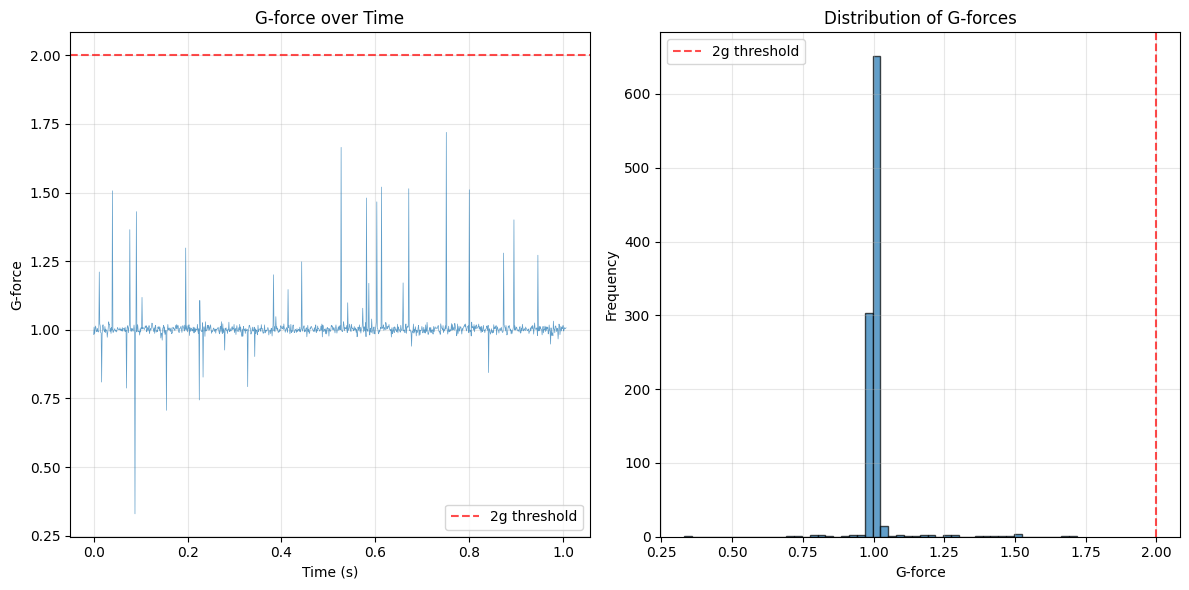

Data exploration complete! You can now run the pipeline notebooks.


In [44]:
# Create a simple visualization of the data
if imu_files and 'r_gs' in df_imu.columns:
    plt.figure(figsize=(12, 6))
    
    # Plot g-force over time
    plt.subplot(1, 2, 1)
    plt.plot(df_imu['t'], df_imu['r_gs'], alpha=0.7, linewidth=0.5)
    plt.axhline(y=2.0, color='red', linestyle='--', alpha=0.7, label='2g threshold')
    plt.xlabel('Time (s)')
    plt.ylabel('G-force')
    plt.title('G-force over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot histogram of g-forces
    plt.subplot(1, 2, 2)
    plt.hist(df_imu['r_gs'], bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(x=2.0, color='red', linestyle='--', alpha=0.7, label='2g threshold')
    plt.xlabel('G-force')
    plt.ylabel('Frequency')
    plt.title('Distribution of G-forces')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Data exploration complete! You can now run the pipeline notebooks.")
else:
    print("No data to visualize. Make sure sample data files are available.")
